In [58]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

import seaborn as sns

In [59]:
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', lambda x: '% .2f' % x)

In [60]:
msft = yf.Ticker("CIB")
apple = yf.Ticker("AAPL")
oil = yf.Ticker('CL=F')
gold = yf.Ticker('GC=F')

In [61]:
Acciones = [msft,apple,oil,gold]
Acciones_Nombre =['Bancolombia','Apple','petroleo','oro']
Acciones.index(msft)

0

Carga de matriz de retornos

In [62]:
k = 4
Retornos=pd.DataFrame()
for accion in Acciones:
  Retornos[Acciones_Nombre[Acciones.index(accion)]] = accion.history(period="2y", interval="1wk")[['Close']].pct_change()[1:]
Retornos

,Bancolombia,Apple,petroleo,oro
Date,,,,
2021-04-12 00:00:00-04:00,0.02,0.01,0.06,0.02
2021-04-19 00:00:00-04:00,-0.07,0.00,-0.02,-0.00
2021-04-26 00:00:00-04:00,-0.05,-0.02,0.02,-0.01
2021-05-03 00:00:00-04:00,0.03,-0.01,0.02,0.04
2021-05-10 00:00:00-04:00,0.04,-0.02,0.01,0.00
...,...,...,...,...
2023-03-06 00:00:00-05:00,-0.03,-0.02,-0.04,0.01
2023-03-13 00:00:00-04:00,-0.12,0.04,-0.13,0.06
2023-03-20 00:00:00-04:00,0.02,0.03,0.04,0.01


# Matriz de covarianza

In [63]:
from scipy.stats import spearmanr
R = np.corrcoef(Retornos, rowvar=False)
Rho, p = spearmanr(Retornos, axis=0)

Text(0.5, 1.0, 'matriz de convarianza de rango')

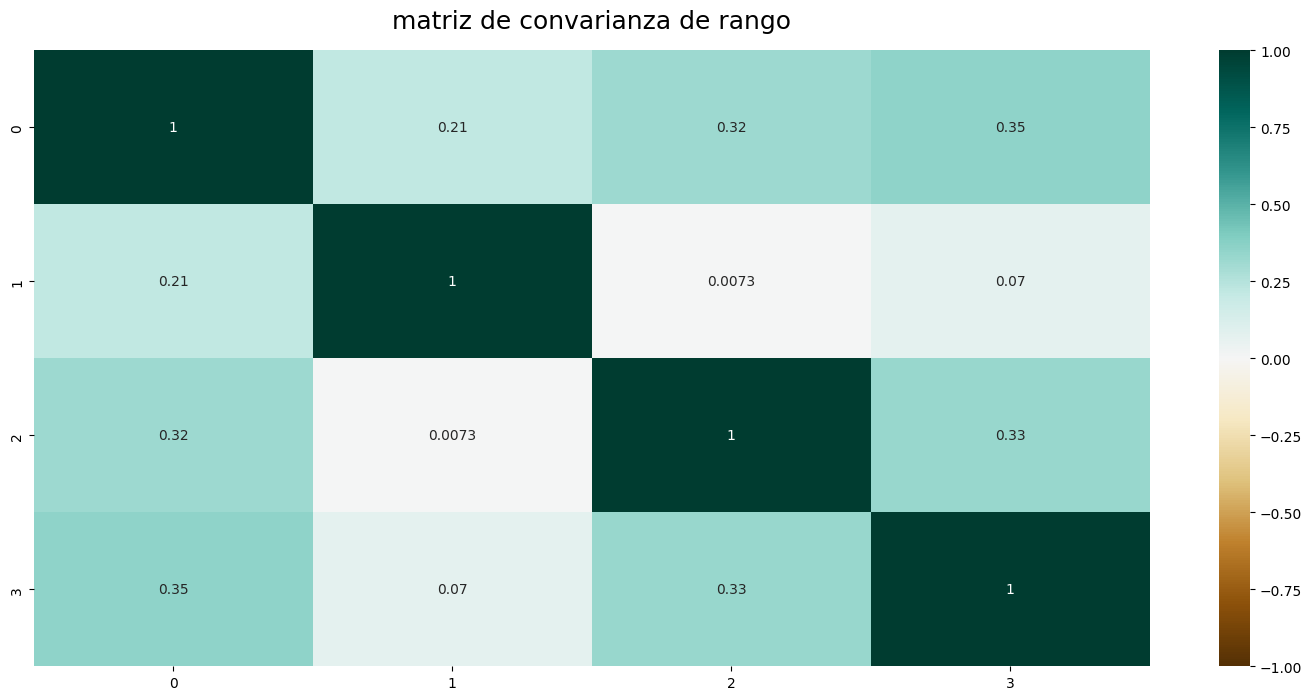

In [64]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(Rho, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('matriz de convarianza de rango', fontdict={'fontsize':18}, pad=16)

# Matriz de correlación Lineal

Text(0.5, 1.0, 'matriz de correlación')

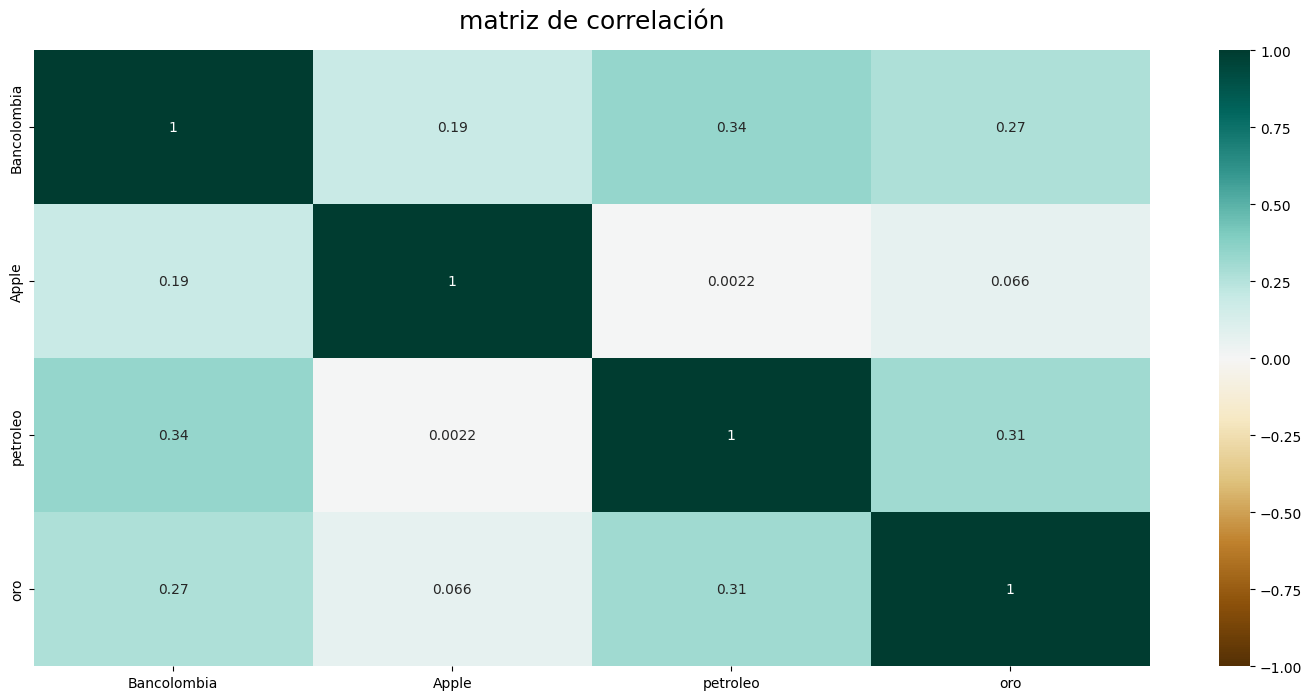

In [65]:
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
#mascara = np.triu(np.ones_like(datos_ml.corr(), dtype=bool)) mask=mascara,
heatmap = sns.heatmap(Retornos.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('matriz de correlación', fontdict={'fontsize':18}, pad=16)

## Optimizacion del portafolio

In [66]:
from scipy.stats import spearmanr

Rho, p = spearmanr(Retornos, axis=0)


$$\sigma(\overline{\omega}) = \omega^T\cdot H\cdot \omega $$
$$\mathbb{E}(r^T\cdot \omega) \geq R $$

donde:
- $R$ : son los retornos deseados
- $\omega$ son los porcentajes que quiero en cada portafolio

In [112]:
import numpy as np
from scipy.optimize import minimize 
 
# Función objetivo a minimizar
retornos  = np.array([0.2,0.4,0.2,0.4])

R = 0.2 

def sigma(w, cov):
    return np.dot(w.T, np.dot(cov, w))

def retorno(w):
    return np.dot(w.T, retornos) - R

# Restricciones de ponderación
restriccion = ({'type': 'eq', 'fun': retorno},
               {'type': 'eq', 'fun': lambda w: np.sum(w) - 1})


# Rango de ponderación de los activos (el valor de cada 0<w_i<1)
rango = tuple((0, 1) for i in range(len(retornos)))

# Solución de la optimización
w0 = np.ones(len(retornos)) / len(retornos) # Punto inicial de la optimización

result = minimize(sigma, w0, args=(Rho,), method='SLSQP', constraints=restriccion, bounds=rango)

print(result)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.6587431985490237
       x: [ 5.000e-01  0.000e+00  5.000e-01  7.806e-17]
     nit: 4
     jac: [ 1.317e+00  2.214e-01  1.317e+00  6.815e-01]
    nfev: 20
    njev: 4


In [111]:

print(f"El vector de las distribuciones para mi portafolio es:\n {result.x.round(4)}")
print(f"El vector de las distribuciones para mi portafolio es:\n {result.x.round(4)}")

El vector de las distribuciones para mi portafolio es:
 [0.5 0.  0.5 0. ]
El vector de las distribuciones para mi portafolio es:
 [0.5 0.  0.5 0. ]


- jac:  jacobiano
- fun : es $\sigma_{min}$ el valor minimo alcanzado
- nit : se iteró nit veces hasta obtener el optimo

In [88]:
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 0.6589832497599488
       x: [ 5.000e-01  8.934e-17  5.000e-01  0.000e+00]
     nit: 4
     jac: [ 1.318e+00  2.212e-01  1.318e+00  6.818e-01]
    nfev: 20
    njev: 4

##  Implementacion en una clase

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

from scipy.optimize import minimize 

import seaborn as sns

msft = yf.Ticker("CIB")
apple = yf.Ticker("AAPL")
oil = yf.Ticker('CL=F')
gold = yf.Ticker('GC=F')

Acciones = [msft,apple,oil,gold]
Acciones_Nombre =['Bancolombia','Apple','petroleo','oro']
Acciones.index(msft)


## Creacion de matriz de retornos
k = 4
Retornos=pd.DataFrame()
for accion in Acciones:
  Retornos[Acciones_Nombre[Acciones.index(accion)]] = accion.history(period="2y", interval="1wk")[['Close']].pct_change()[1:]
Retornos


## Matriz de covarianza
from scipy.stats import spearmanr
R = np.corrcoef(Retornos, rowvar=False)  # coeficiente de correlacion

Rho, _ = spearmanr(Retornos, axis=0)

r = np.array([0.2,0.4,0.2,0.4])  ## vector de retornos esperados que no se como calcular

class MiPortafolio:
  def __init__(self,R,Rho,r):
    self.R = R
    self.Rho = Rho
    self.retornos = r

  def valor_retorno_deseado(self):
    print(self.R)

  def sigma(self, w, cov):
    return np.dot(w.T, np.dot(cov, w))

  def retorno(self, w):
    return np.dot(w.T, retornos) - self.R

  def minimizar(self):

    # Restricciones de ponderación
    restriccion = ({'type': 'eq', 'fun': self.retorno},
               {'type': 'eq', 'fun': lambda w: np.sum(w) - 1})


  # Rango de ponderación de los activos (el valor de cada 0<w_i<1)
    rango = tuple((0, 1) for i in range(len(self.retornos)))

# Solución de la optimización
    w0 = np.ones(len(self.retornos)) / len(self.retornos) # Punto inicial de la optimización

    result = minimize(self.sigma, w0, args=(self.Rho,), method='SLSQP', constraints=restriccion, bounds=rango)
    return(result)


portafolio1 = MiPortafolio(0.2,Rho,r)

  

In [116]:
portafolio1.minimizar()

 message: Positive directional derivative for linesearch
 success: False
  status: 8
     fun: 0.5349887979848509
       x: [ 0.000e+00  5.000e-01  8.328e-17  5.000e-01]
     nit: 92
     jac: [ 5.667e-01  1.070e+00  3.361e-01  1.070e+00]
    nfev: 1161
    njev: 88